In [1]:
### This is a gene specific analysis notebook
from candidate_utils import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Gene-transcript dict
dict_name = pickle.load(open(os.path.join(dir_refs,'dict_name_forcov_062121.pkl'), 'rb'))

In [4]:
gene_name = 'SOX18'

In [5]:
# Find transcript for the gene
for transcript,gene in dict_name.items():
    if gene == gene_name:
        print(transcript)

ENST00000340356


<span style="color:blue">**The histology subtypes of patients with the mutation**</span>.


In [6]:
df_str, df_num = get_num_str(gene_name)

/opt/aci/sw/anaconda3/2020.07_gcc-4.8.5-bzb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (1,17,24,33,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [7]:
df_str

,dcc_specimen_type,histology_tier3,histology_tier4,tumour_histological_type,tumour_stage,tumour_histological_comment,specimen_donor_treatment_type
syn,{'Primary tumour - solid tissue': 5},{'Adenocarcinoma': 5},{'Adenocarcinoma': 5},"{'Adenocarcinoma, NOS': 5}","{'1a': 1, '1b': 1, '3a': 1, '3b': 1, '4': 1}",{nan: 5},"{'no treatment': 1, nan: 4}"
all,{'Primary tumour - solid tissue': 97},{'Adenocarcinoma': 97},{'Adenocarcinoma': 97},"{'Adenocarcinoma, NOS': 97}","{'3b': 17, '2b': 3, '1a': 18, '3c': 12, '4': 1...",{nan: 97},"{nan: 47, 'no treatment': 49, 'chemotherapy': 1}"


In [8]:
df_num

SV.events  Coding.SNVs  Non.coding.SNVs  \
mut_status                                                   
syn        count    5.000000     5.000000         5.000000   
           mean   238.000000   244.800000     36370.000000   
           std    134.467468    47.494210     16101.188528   
           min    144.000000   190.000000     19163.000000   
           25%    148.000000   222.000000     24469.000000   
           50%    151.000000   223.000000     34056.000000   
           75%    299.000000   288.000000     45001.000000   
           max    448.000000   301.000000     59161.000000   
all        count   87.000000    97.000000        97.000000   
           mean   227.160920   178.979381     27609.649485   
           std    154.841169    99.508896     20645.827299   
           min      0.000000     3.000000        58.000000   
           25%    137.500000   112.000000     13782.000000   
           50%    184.000000   167.000000     22485.000000   
           75%    286.000000   214.000000     34809.000000   
           max    894.000000   579.000000    123394.000000   

                  CNA.events..do_not_use.  Retrotransposon.insertions  \
mut_status                                                              
syn        count                 5.000000                    5.000000   
           mean                582.800000                   95.800000   
           std                 252.805657                   65.560659   
           min                 390.000000                   24.000000   
           25%                 393.000000                   44.000000   
           50%                 453.000000                   96.000000   
           75%                 708.000000                  128.000000   
           max                 970.000000                  187.000000   
all        count                97.000000                   97.000000   
           mean                547.680412                   90.000000   
           std                 324.083919                  123.975468   
           min                  69.000000                    0.000000   
           25%                 343.000000                   20.000000   
           50%                 472.000000                   41.000000   
           75%                 701.000000                  113.000000   
           max                1905.000000                  638.000000   

                  Mitochondrial.mutations   all.Indels  
mut_status                                              
syn        count                 5.000000     5.000000  
           mean                  4.400000  2008.400000  
           std                   2.880972   467.101488  
           min                   2.000000  1455.000000  
           25%                   2.000000  1783.000000  
           50%                   4.000000  2002.000000  
           75%                   5.000000  2079.000000  
           max                   9.000000  2723.000000  
all        count                97.000000    97.000000  
           mean                  4.762887  1581.268041  
           std                   2.981796   914.689742  
           min                   0.000000     1.000000  
           25%                   3.000000   934.000000  
           50%                   4.000000  1574.000000  
           75%                   7.000000  2104.000000  
           max                  14.000000  4620.000000

<span style="color:blue">**Mutation**</span>.


In [9]:
df_all, df_mut, donor_list = get_mut(gene_name)

/opt/aci/sw/anaconda3/2020.07_gcc-4.8.5-bzb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (1,17,24,33,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Total 97 patients
5 patients have synonymous mutations, they are: ['DO50345', 'DO50326', 'DO50387', 'DO50401', 'DO50337']
20:g.62680308C>T
20:g.62679639G>A
20:g.62680134C>T
20:g.62680053G>A
20:g.62679855C>T


In [10]:
df_all.loc[pd.IndexSlice[gene_name, :,donor_list],'Genome_Change']

Hugo_Symbol  Variant_Classification  Donor_ID
SOX18        Silent                  DO50345     g.chr20:62680308C>T
                                     DO50326     g.chr20:62679639G>A
                                     DO50387     g.chr20:62680134C>T
                                     DO50401     g.chr20:62680053G>A
                                     DO50337     g.chr20:62679855C>T
Name: Genome_Change, dtype: object

<span style="color:blue">**CNV**</span>.


In [11]:
cnv = get_cnv(donor_list, gene_name)

                               8ff9b1b6-a498-47fe-a970-ab7cfb64e653
Gene Symbol Locus ID Cytoband                                      
SOX18       54345    20q13.33                                   NaN
                               a08c196e-4f96-4b16-94b4-aa6a0153ac50
Gene Symbol Locus ID Cytoband                                      
SOX18       54345    20q13.33                                   NaN
                               a284fe9d-9afd-4472-8d70-243ca9be5c2c
Gene Symbol Locus ID Cytoband                                      
SOX18       54345    20q13.33                                   NaN
                               cb381d49-4546-400c-af02-f877083caa0a
Gene Symbol Locus ID Cytoband                                      
SOX18       54345    20q13.33                                   NaN
                               fab0be4b-c84a-45cd-a76f-44d9a8bf1846
Gene Symbol Locus ID Cytoband                                      
SOX18       54345    20q13.33                   

<span style="color:blue">**Expression PCAWG**</span>.


/opt/aci/sw/anaconda3/2020.07_gcc-4.8.5-bzb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (1,17,24,33,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Number of normal patient: 0
Number of synonymous patients: 0
Number of other tumor patients:7
test statistic:0.0,p-value:0.0


/opt/aci/sw/anaconda3/2020.07_gcc-4.8.5-bzb/lib/python3.8/site-packages/scipy/stats/stats.py:7039: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


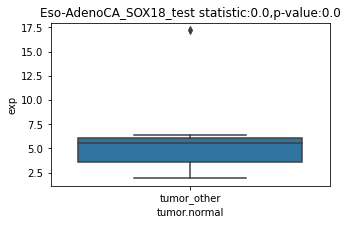

In [12]:
get_expression(gene_name)

<span style="color:blue">**CRISPR**</span>.


In [13]:
get_lineage(gene_name, 'Esophagus')

['Esophagus Adenocarcinoma' 'Esophagus Squamous']


7 in histology subtype
982 not in histology subtype
test statistic:2684.0,    p-value:0.1588
test statistic:3347.5,    p-value:0.4529


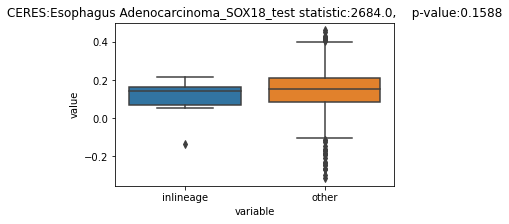

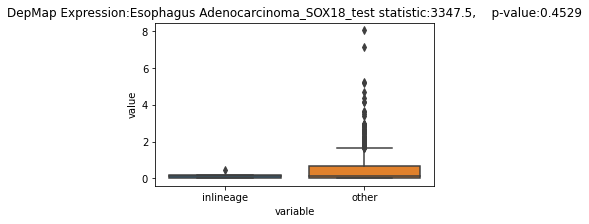

In [14]:
get_CERES(gene_name, 'Esophagus Adenocarcinoma')

<span style="color:blue">**Alternative Splicing**</span>  

In [15]:
dir_splice = '../../anno_ref/ICGC/alternative_splicing'
exp_dir = '../../anno_ref/ICGC/pcawg_rnaseq/'
# Read aliquot id information
df_exp_info = pd.read_csv(os.path.join(exp_dir,'rnaseq.metadata.tsv'), sep = '\t')

In [16]:
### If patient is in the splicing file(transcriptome analysis info)
for donor in donor_list:
    tumor_id = df_exp_info[df_exp_info['icgc_donor_id'] == donor]['aliquot_id']
    if len(tumor_id) ==0:
        print(f'{donor} is not in PCAWG transcriptome analysis')

DO50345 is not in PCAWG transcriptome analysis
DO50326 is not in PCAWG transcriptome analysis
DO50387 is not in PCAWG transcriptome analysis
DO50401 is not in PCAWG transcriptome analysis
DO50337 is not in PCAWG transcriptome analysis
